<a href="https://colab.research.google.com/github/younghoonNa/ML/blob/main/2022_Summer_mentoring/ML_week2_%EC%8B%A4%EC%8A%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
#내 구글 드라이브로 마운트
from google.colab import drive
path = '/content/drive'
drive.mount(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
path = "/content/drive/MyDrive/Kaggle_Spaceship-Titanic"

In [95]:
import pandas as pd
import numpy as np

In [96]:
train = pd.read_csv(path + '/train.csv')
train.head(10) # 앞의 5개

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [97]:
test = pd.read_csv(path + '/test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [98]:
submission = pd.read_csv(path + '/sample_submission.csv')
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [100]:
# 숫자형 특성을 요약해줌
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


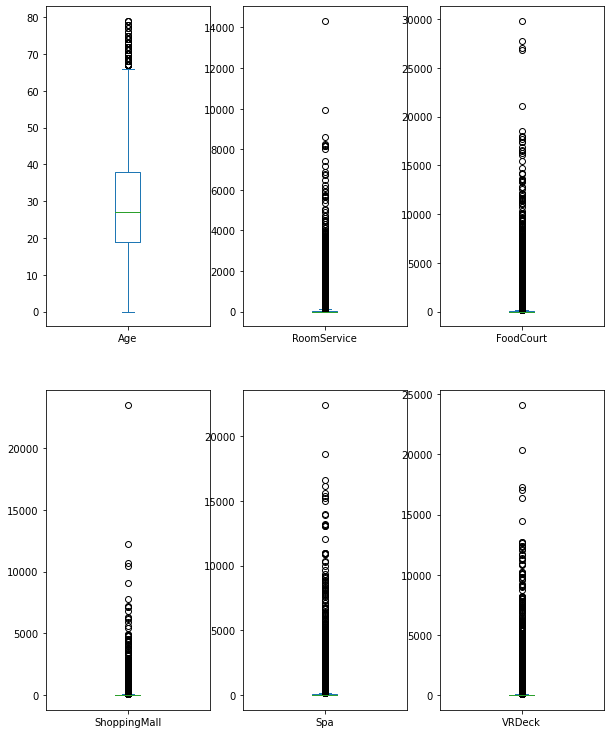

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

train.plot(kind='box', subplots=True, layout = (3,3), figsize = (10,20))
plt.show() 

In [102]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [103]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [104]:
train['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [105]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [106]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [107]:
train.isna()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [108]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3651d37550>,
      dtype=object)

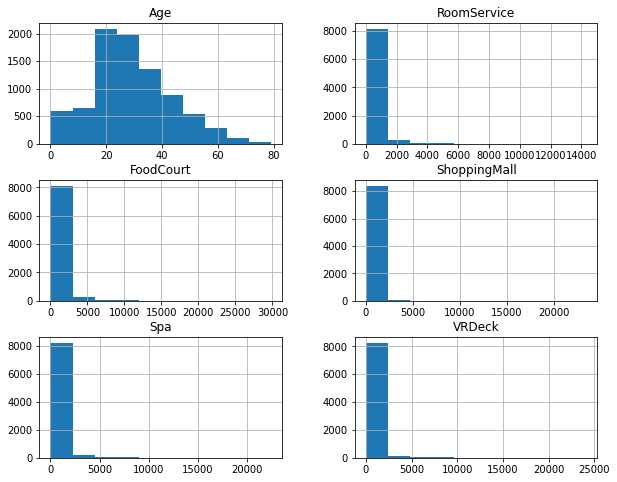

In [109]:
train.hist(figsize = (10, 8)) # -> 숫자형 특성을 그림으로 시각화

In [110]:
train = train.iloc[:, 1:] #PassengerId 특성 제거 # iloc -> 인덱스 기준으로 특징을 추출
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


## Data Preprocessing
- fillna()
- dropna()

In [112]:
# train['Cabin'] = train['Cabin'].dropna()
 # -> 제거 안될 경우 뒤에 how = "any" or "all" 
# any -> 하나만 NaN 일 경우 제거
# all -> 모두 NaN 일 겨우 제거
# train['Cabin'] = train['Cabin'].dropna(axis = 0) 
# train['Cabin'].isna().value_counts()

In [113]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [114]:
train['HomePlanet'] = train['HomePlanet'].fillna("Earth")
(train['HomePlanet'].isna() == True).value_counts()

False    8693
Name: HomePlanet, dtype: int64

In [115]:
train = train.dropna()
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6769 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6769 non-null   object 
 1   CryoSleep     6769 non-null   object 
 2   Cabin         6769 non-null   object 
 3   Destination   6769 non-null   object 
 4   Age           6769 non-null   float64
 5   VIP           6769 non-null   object 
 6   RoomService   6769 non-null   float64
 7   FoodCourt     6769 non-null   float64
 8   ShoppingMall  6769 non-null   float64
 9   Spa           6769 non-null   float64
 10  VRDeck        6769 non-null   float64
 11  Name          6769 non-null   object 
 12  Transported   6769 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 694.1+ KB


## Feature Engineering

In [117]:
cnt = 0
train["Cabin_first"] = 0
train["Cabin_second"] = 0
train["Cabin_third"] = 0

for element in train["Cabin"]:
  # print(cnt, element)
  train['Cabin_first'][cnt] = element.split('/')[0]
  train['Cabin_second'][cnt] = element.split('/')[1]
  train['Cabin_third'][cnt] = element.split('/')[2]
  cnt += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [118]:
train['Cabin_first'].value_counts()

F    1713
G    1552
0    1524
E     535
B     505
C     477
D     301
A     161
T       1
Name: Cabin_first, dtype: int64

In [119]:
train['Cabin_second'].value_counts()

0       1535
82        17
176       16
186       15
18        15
        ... 
616        1
620        1
1119       1
1311       1
874        1
Name: Cabin_second, Length: 1635, dtype: int64

In [120]:
train['Cabin_third'].value_counts()

S    2689
P    2556
0    1524
Name: Cabin_third, dtype: int64

In [121]:
train = train.drop('Cabin', axis = 1)
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_first,Cabin_second,Cabin_third
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,0,0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,0,0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,0,0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,0,0,0


In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6769 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6769 non-null   object 
 1   CryoSleep     6769 non-null   object 
 2   Destination   6769 non-null   object 
 3   Age           6769 non-null   float64
 4   VIP           6769 non-null   object 
 5   RoomService   6769 non-null   float64
 6   FoodCourt     6769 non-null   float64
 7   ShoppingMall  6769 non-null   float64
 8   Spa           6769 non-null   float64
 9   VRDeck        6769 non-null   float64
 10  Name          6769 non-null   object 
 11  Transported   6769 non-null   bool   
 12  Cabin_first   6769 non-null   object 
 13  Cabin_second  6769 non-null   int64  
 14  Cabin_third   6769 non-null   object 
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 1.0+ MB


In [123]:
train = train.drop('Name', axis = 1)
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_first,Cabin_second,Cabin_third
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,0,0,0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,0,0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,0,0,0


### get_dummies 를 통한 범주형 데이터 처리

In [124]:
HomePlanet_dummmies = pd.get_dummies(train['HomePlanet'], prefix = "HomePlanet")
CryoSleep_dummmies = pd.get_dummies(train['CryoSleep'], prefix= 'CryoSleep')
Cabin_first_dummmies = pd.get_dummies(train['Cabin_first'], prefix = "Cabin_first")
Cabin_third_dummmies = pd.get_dummies(train['Cabin_third'], prefix = "Cabin_third")
Destination_dummmies = pd.get_dummies(train['Destination'], prefix = "Destination")
VIP_dummmies = pd.get_dummies(train['VIP'], prefix = 'VIP')

train = pd.concat((train, HomePlanet_dummmies), axis=1)
train = pd.concat((train, CryoSleep_dummmies), axis=1)
train = pd.concat((train, Cabin_first_dummmies), axis=1)
train = pd.concat((train, Cabin_third_dummmies), axis=1)
train = pd.concat((train, Destination_dummmies), axis=1)
train = pd.concat((train, VIP_dummmies),  axis=1)

In [125]:
train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_second,HomePlanet_Earth,HomePlanet_Europa,...,Cabin_first_G,Cabin_first_T,Cabin_third_0,Cabin_third_P,Cabin_third_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
Age,1.000000,0.075097,0.135333,0.042885,0.124553,0.103548,-0.079598,0.001974,-0.207438,0.224234,...,-0.013973,-0.008274,-0.008929,0.019162,-0.011363,0.021298,-0.026348,-0.002173,-0.099253,0.099253
RoomService,0.075097,1.000000,-0.013909,0.061219,0.012638,-0.026950,-0.247491,0.003359,-0.140515,-0.083747,...,0.001970,-0.004225,-0.002156,-0.010550,0.012293,-0.033661,-0.062528,0.069475,-0.033715,0.033715
FoodCourt,0.135333,-0.013909,1.000000,-0.012273,0.215259,0.217949,0.054972,0.003666,-0.221637,0.374509,...,-0.002109,-0.003460,-0.003937,-0.005837,0.009143,0.133314,-0.066363,-0.076087,-0.134010,0.134010
ShoppingMall,0.042885,0.061219,-0.012273,1.000000,0.021633,-0.000525,0.008586,0.018927,-0.083510,-0.022813,...,0.019706,-0.003761,-0.006876,0.012678,-0.006691,-0.008490,-0.035137,0.029800,-0.013316,0.013316
Spa,0.124553,0.012638,0.215259,0.021633,1.000000,0.149180,-0.218847,-0.005939,-0.158177,0.262920,...,-0.002298,-0.003309,-0.010690,-0.011494,0.020512,0.078097,-0.055554,-0.033999,-0.061983,0.061983
VRDeck,0.103548,-0.026950,0.217949,-0.000525,0.149180,1.000000,-0.207787,0.000161,-0.155711,0.286336,...,-0.021189,-0.003289,-0.004154,0.000512,0.003038,0.089159,-0.047695,-0.048786,-0.126259,0.126259
Transported,-0.079598,-0.247491,0.054972,0.008586,-0.218847,-0.207787,1.000000,0.042828,-0.165671,0.179423,...,0.020272,-0.012236,-0.024099,0.016154,0.004566,0.124679,0.004435,-0.113316,0.042010,-0.042010
Cabin_second,0.001974,0.003359,0.003666,0.018927,-0.005939,0.000161,0.042828,1.000000,-0.011781,0.011879,...,0.311862,-0.010878,-0.485536,0.232996,0.183606,0.008767,-0.023990,0.007438,0.019190,-0.019190
HomePlanet_Earth,-0.207438,-0.140515,-0.221637,-0.083510,-0.158177,-0.155711,-0.165671,-0.011781,1.000000,-0.634589,...,0.000716,0.010975,0.008133,0.009138,-0.015996,-0.154818,0.235063,-0.011803,0.166575,-0.166575
HomePlanet_Europa,0.224234,-0.083747,0.374509,-0.022813,0.262920,0.286336,0.179423,0.011879,-0.634589,1.000000,...,-0.002107,-0.006965,-0.002186,-0.005462,0.007277,0.293288,-0.164732,-0.155512,-0.151733,0.151733


In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6769 entries, 0 to 8692
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 6769 non-null   object 
 1   CryoSleep                  6769 non-null   object 
 2   Destination                6769 non-null   object 
 3   Age                        6769 non-null   float64
 4   VIP                        6769 non-null   object 
 5   RoomService                6769 non-null   float64
 6   FoodCourt                  6769 non-null   float64
 7   ShoppingMall               6769 non-null   float64
 8   Spa                        6769 non-null   float64
 9   VRDeck                     6769 non-null   float64
 10  Transported                6769 non-null   bool   
 11  Cabin_first                6769 non-null   object 
 12  Cabin_second               6769 non-null   int64  
 13  Cabin_third                6769 non-null   objec

## test 데이터도 똑같이 처리

In [127]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [128]:
test = test.drop('PassengerId', axis = 1)
test = test.drop('Name', axis = 1)

In [129]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
dtypes: float64(6), object(5)
memory usage: 367.7+ KB


In [130]:
test['HomePlanet'] = test['HomePlanet'].fillna("Earth")
test['HomePlanet'].isnull().sum()

0

In [131]:
test['CryoSleep'].value_counts()

False    2640
True     1544
Name: CryoSleep, dtype: int64

In [132]:
test['CryoSleep'] = test['CryoSleep'].fillna(False)
test['CryoSleep'].value_counts()

False    2733
True     1544
Name: CryoSleep, dtype: int64

In [133]:
test['Destination'].value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [134]:
test['Destination'] = test['Destination'].fillna("TRAPPIST-1e")
test['Destination'].value_counts()

TRAPPIST-1e      3048
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [135]:
cnt = 0
test["Cabin_first"] = 0
test["Cabin_second"] = 0
test["Cabin_third"] = 0

for element in test["Cabin"]:
  # print(cnt, element)
  if element is np.NaN:
    test['Cabin_first'][cnt] = np.NaN
    test['Cabin_second'][cnt] = np.NaN
    test['Cabin_third'][cnt] = np.NaN
    cnt+=1
    continue
  test['Cabin_first'][cnt] = element.split('/')[0]
  test['Cabin_second'][cnt] = element.split('/')[1]
  test['Cabin_third'][cnt] = element.split('/')[2]
  cnt += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/li

In [136]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   bool   
 2   Cabin         4177 non-null   object 
 3   Destination   4277 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Cabin_first   4177 non-null   object 
 12  Cabin_second  4177 non-null   float64
 13  Cabin_third   4177 non-null   object 
dtypes: bool(1), float64(7), object(6)
memory usage: 438.7+ KB


In [137]:
test['Cabin_first'].value_counts()

F    1445
G    1222
E     447
B     362
C     355
D     242
A      98
T       6
Name: Cabin_first, dtype: int64

In [138]:
test['Cabin_first'] = test['Cabin_first'].fillna("F")
test['Cabin_first'].value_counts()

F    1545
G    1222
E     447
B     362
C     355
D     242
A      98
T       6
Name: Cabin_first, dtype: int64

In [139]:
test['Cabin_second'].mean()

610.178836485516

In [140]:
test['Cabin_second'] = test['Cabin_second'].fillna(test['Cabin_second'].mean())
test['Cabin_second'].isnull().sum()

0

In [141]:
test['Cabin_third'].value_counts() 

S    2093
P    2084
Name: Cabin_third, dtype: int64

In [142]:
train['Cabin_third'].value_counts()

S    2689
P    2556
0    1524
Name: Cabin_third, dtype: int64

In [143]:
test['Cabin_third'] = test['Cabin_third'].fillna("S")
test['Cabin_third'].value_counts()

S    2193
P    2084
Name: Cabin_third, dtype: int64

In [144]:
test['VIP'].value_counts()

False    4110
True       74
Name: VIP, dtype: int64

In [145]:
test['VIP'] = test['VIP'].fillna(False)
test["VIP"].value_counts()

False    4203
True       74
Name: VIP, dtype: int64

In [146]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   bool   
 2   Cabin         4177 non-null   object 
 3   Destination   4277 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4277 non-null   bool   
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Cabin_first   4277 non-null   object 
 12  Cabin_second  4277 non-null   float64
 13  Cabin_third   4277 non-null   object 
dtypes: bool(2), float64(7), object(5)
memory usage: 409.4+ KB


In [147]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['RoomService'] = test['RoomService'].fillna(test['RoomService'].mean())
test['FoodCourt'] = test['FoodCourt'].fillna(test['FoodCourt'].mean())
test['ShoppingMall'] = test['ShoppingMall'].fillna(test['ShoppingMall'].mean())
test['Spa'] = test['Spa'].fillna(test['Spa'].mean())
test['VRDeck'] = test['VRDeck'].fillna(test['VRDeck'].mean())

In [148]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   bool   
 2   Cabin         4177 non-null   object 
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   bool   
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
 11  Cabin_first   4277 non-null   object 
 12  Cabin_second  4277 non-null   float64
 13  Cabin_third   4277 non-null   object 
dtypes: bool(2), float64(7), object(5)
memory usage: 409.4+ KB


In [149]:
HomePlanet_dummmies = pd.get_dummies(test['HomePlanet'], prefix = 'HomePlanet')
CryoSleep_dummmies = pd.get_dummies(test['CryoSleep'], prefix = 'CryoSleep')
Cabin_first_dummmies = pd.get_dummies(test['Cabin_first'], prefix = 'Cabin_first')
Cabin_third_dummmies = pd.get_dummies(test['Cabin_third'], prefix = 'Cabin_third')
Destination_dummmies = pd.get_dummies(test['Destination'], prefix = 'Destination')
VIP_dummmies = pd.get_dummies(test['VIP'], prefix = 'VIP')

test = pd.concat((test, HomePlanet_dummmies), axis=1)
test = pd.concat((test, CryoSleep_dummmies), axis=1)
test = pd.concat((test, Cabin_first_dummmies), axis=1)
test = pd.concat((test, Cabin_third_dummmies), axis=1)
test = pd.concat((test, Destination_dummmies), axis=1)
test = pd.concat((test, VIP_dummmies), axis=1 )


In [150]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 4277 non-null   object 
 1   CryoSleep                  4277 non-null   bool   
 2   Cabin                      4177 non-null   object 
 3   Destination                4277 non-null   object 
 4   Age                        4277 non-null   float64
 5   VIP                        4277 non-null   bool   
 6   RoomService                4277 non-null   float64
 7   FoodCourt                  4277 non-null   float64
 8   ShoppingMall               4277 non-null   float64
 9   Spa                        4277 non-null   float64
 10  VRDeck                     4277 non-null   float64
 11  Cabin_first                4277 non-null   object 
 12  Cabin_second               4277 non-null   float64
 13  Cabin_third                4277 non-null   objec

In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6769 entries, 0 to 8692
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 6769 non-null   object 
 1   CryoSleep                  6769 non-null   object 
 2   Destination                6769 non-null   object 
 3   Age                        6769 non-null   float64
 4   VIP                        6769 non-null   object 
 5   RoomService                6769 non-null   float64
 6   FoodCourt                  6769 non-null   float64
 7   ShoppingMall               6769 non-null   float64
 8   Spa                        6769 non-null   float64
 9   VRDeck                     6769 non-null   float64
 10  Transported                6769 non-null   bool   
 11  Cabin_first                6769 non-null   object 
 12  Cabin_second               6769 non-null   int64  
 13  Cabin_third                6769 non-null   objec

In [152]:
train_list = train.columns
train_list

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Cabin_first', 'Cabin_second', 'Cabin_third', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Cabin_first_0', 'Cabin_first_A', 'Cabin_first_B',
       'Cabin_first_C', 'Cabin_first_D', 'Cabin_first_E', 'Cabin_first_F',
       'Cabin_first_G', 'Cabin_first_T', 'Cabin_third_0', 'Cabin_third_P',
       'Cabin_third_S', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True'],
      dtype='object')

In [153]:
train_list = [     'Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'Cabin_second', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Cabin_first_0', 'Cabin_first_A', 'Cabin_first_B',
       'Cabin_first_C', 'Cabin_first_D', 'Cabin_first_E', 'Cabin_first_F',
       'Cabin_first_G', 'Cabin_first_T', 'Cabin_third_0', 'Cabin_third_P',
       'Cabin_third_S', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True'
]

In [154]:
X = train[train_list]
Y = train['Transported']

In [155]:
X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_second,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_first_G,Cabin_first_T,Cabin_third_0,Cabin_third_P,Cabin_third_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [156]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6769 entries, 0 to 8692
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6769 non-null   float64
 1   RoomService                6769 non-null   float64
 2   FoodCourt                  6769 non-null   float64
 3   ShoppingMall               6769 non-null   float64
 4   Spa                        6769 non-null   float64
 5   VRDeck                     6769 non-null   float64
 6   Cabin_second               6769 non-null   int64  
 7   HomePlanet_Earth           6769 non-null   uint8  
 8   HomePlanet_Europa          6769 non-null   uint8  
 9   HomePlanet_Mars            6769 non-null   uint8  
 10  CryoSleep_False            6769 non-null   uint8  
 11  CryoSleep_True             6769 non-null   uint8  
 12  Cabin_first_0              6769 non-null   uint8  
 13  Cabin_first_A              6769 non-null   uint8

In [157]:
Y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 6769, dtype: bool

In [158]:
# train 및 test 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.1) # 9:1

In [159]:
x_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_second,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_first_G,Cabin_first_T,Cabin_third_0,Cabin_third_P,Cabin_third_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
3180,27.0,0.0,18481.0,0.0,2.0,3875.0,715,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1091,18.0,0.0,0.0,0.0,0.0,0.0,231,1,0,0,...,1,0,0,0,1,0,0,1,1,0
6323,32.0,0.0,0.0,0.0,0.0,0.0,1787,1,0,0,...,0,0,0,1,0,0,1,0,1,0
6025,40.0,773.0,3729.0,43.0,10.0,0.0,1348,0,1,0,...,1,0,0,1,0,0,0,1,1,0
3427,32.0,0.0,0.0,0.0,0.0,0.0,156,0,1,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,45.0,878.0,0.0,430.0,0.0,0.0,422,0,0,1,...,0,0,0,1,0,0,0,1,1,0
6706,13.0,244.0,0.0,100.0,423.0,14.0,1775,1,0,0,...,0,0,0,0,1,0,0,1,1,0
6745,26.0,0.0,0.0,0.0,0.0,0.0,1489,1,0,0,...,1,0,0,0,1,0,1,0,1,0
6964,28.0,6.0,3392.0,3944.0,987.0,0.0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [160]:
x_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_second,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_first_G,Cabin_first_T,Cabin_third_0,Cabin_third_P,Cabin_third_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
232,33.0,0.0,1.0,0.0,8620.0,1063.0,74,0,1,0,...,0,0,0,1,0,0,0,1,1,0
7344,16.0,0.0,11.0,0.0,863.0,0.0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3430,57.0,0.0,3859.0,13.0,195.0,3874.0,957,0,1,0,...,0,0,0,1,0,0,0,1,1,0
6828,21.0,21.0,0.0,874.0,226.0,0.0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
68,14.0,0.0,1.0,0.0,0.0,1063.0,11,1,0,0,...,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,35.0,35.0,0.0,14.0,0.0,816.0,1292,1,0,0,...,0,0,0,0,1,0,0,1,1,0
8435,32.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
7316,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
7010,41.0,0.0,1616.0,0.0,758.0,400.0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [161]:
y_train

3180     True
1091     True
6323     True
6025     True
3427     True
        ...  
4873    False
6706    False
6745    False
6964     True
1132     True
Name: Transported, Length: 6092, dtype: bool

In [162]:
y_test

232     False
7344    False
3430    False
6828     True
68      False
        ...  
4955     True
8435     True
7316    False
7010     True
2539    False
Name: Transported, Length: 677, dtype: bool

In [163]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
model = XGBClassifier(n_estimators = 250)
# model = LGBMClassifier()
model.fit(x_train, y_train)
test_pred = model.predict(x_test)

acc = 0 
total = 0
for pred, y_test_1 in zip(test_pred, y_test):

  if (pred == y_test_1):
    acc += 1
  total+= 1

print(acc/total * 100)

81.24076809453472


In [164]:
test_pred.shape

(677,)

In [165]:
help(LGBMClassifier)

Help on class LGBMClassifier in module lightgbm.sklearn:

class LGBMClassifier(LGBMModel, sklearn.base.ClassifierMixin)
 |  LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True, importance_type='split', **kwargs)
 |  
 |  LightGBM classifier.
 |  
 |  Method resolution order:
 |      LGBMClassifier
 |      LGBMModel
 |      sklearn.base.BaseEstimator
 |      sklearn.base.ClassifierMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, X, y, sample_weight=None, init_score=None, eval_set=None, eval_names=None, eval_sample_weight=None, eval_class_weight=None, eval_init_score=None, eval_metric=None, early_stopping_rounds=None, verbose=True, feature_name='auto', cate

In [166]:
y_test

232     False
7344    False
3430    False
6828     True
68      False
        ...  
4955     True
8435     True
7316    False
7010     True
2539    False
Name: Transported, Length: 677, dtype: bool

In [167]:
test_pred.shape

(677,)

In [168]:
train_list

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Cabin_second',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'CryoSleep_False',
 'CryoSleep_True',
 'Cabin_first_0',
 'Cabin_first_A',
 'Cabin_first_B',
 'Cabin_first_C',
 'Cabin_first_D',
 'Cabin_first_E',
 'Cabin_first_F',
 'Cabin_first_G',
 'Cabin_first_T',
 'Cabin_third_0',
 'Cabin_third_P',
 'Cabin_third_S',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'VIP_False',
 'VIP_True']

In [169]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 4277 non-null   object 
 1   CryoSleep                  4277 non-null   bool   
 2   Cabin                      4177 non-null   object 
 3   Destination                4277 non-null   object 
 4   Age                        4277 non-null   float64
 5   VIP                        4277 non-null   bool   
 6   RoomService                4277 non-null   float64
 7   FoodCourt                  4277 non-null   float64
 8   ShoppingMall               4277 non-null   float64
 9   Spa                        4277 non-null   float64
 10  VRDeck                     4277 non-null   float64
 11  Cabin_first                4277 non-null   object 
 12  Cabin_second               4277 non-null   float64
 13  Cabin_third                4277 non-null   objec

In [170]:
test['Cabin_first_0'] = 0
test['Cabin_third_0'] = 0
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 4277 non-null   object 
 1   CryoSleep                  4277 non-null   bool   
 2   Cabin                      4177 non-null   object 
 3   Destination                4277 non-null   object 
 4   Age                        4277 non-null   float64
 5   VIP                        4277 non-null   bool   
 6   RoomService                4277 non-null   float64
 7   FoodCourt                  4277 non-null   float64
 8   ShoppingMall               4277 non-null   float64
 9   Spa                        4277 non-null   float64
 10  VRDeck                     4277 non-null   float64
 11  Cabin_first                4277 non-null   object 
 12  Cabin_second               4277 non-null   float64
 13  Cabin_third                4277 non-null   objec

In [171]:
real_test =  test[train_list]
real_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        4277 non-null   float64
 1   RoomService                4277 non-null   float64
 2   FoodCourt                  4277 non-null   float64
 3   ShoppingMall               4277 non-null   float64
 4   Spa                        4277 non-null   float64
 5   VRDeck                     4277 non-null   float64
 6   Cabin_second               4277 non-null   float64
 7   HomePlanet_Earth           4277 non-null   uint8  
 8   HomePlanet_Europa          4277 non-null   uint8  
 9   HomePlanet_Mars            4277 non-null   uint8  
 10  CryoSleep_False            4277 non-null   uint8  
 11  CryoSleep_True             4277 non-null   uint8  
 12  Cabin_first_0              4277 non-null   int64  
 13  Cabin_first_A              4277 non-null   uint8

In [172]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6769 entries, 0 to 8692
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6769 non-null   float64
 1   RoomService                6769 non-null   float64
 2   FoodCourt                  6769 non-null   float64
 3   ShoppingMall               6769 non-null   float64
 4   Spa                        6769 non-null   float64
 5   VRDeck                     6769 non-null   float64
 6   Cabin_second               6769 non-null   int64  
 7   HomePlanet_Earth           6769 non-null   uint8  
 8   HomePlanet_Europa          6769 non-null   uint8  
 9   HomePlanet_Mars            6769 non-null   uint8  
 10  CryoSleep_False            6769 non-null   uint8  
 11  CryoSleep_True             6769 non-null   uint8  
 12  Cabin_first_0              6769 non-null   uint8  
 13  Cabin_first_A              6769 non-null   uint8

In [173]:
result = model.predict(test[train_list])

In [174]:
result.shape

(4277,)

In [175]:
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [176]:
submission['Transported'] =  result
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [178]:
submission.to_csv('SPACE.csv', index=False)